In [3]:
import pandas as pd
import datetime
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv("YOUR_LOCAL_PATH/SolarPrediction.csv")

In [7]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [8]:
print(data.shape)
data = data.dropna()
print(data.shape)
data.dtypes

(32686, 11)
(32686, 11)


UNIXTime                    int64
Data                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

In [13]:
day_rows = data[(data['Time'] > data['TimeSunRise']) & (data['Time'] < data['TimeSunSet'])]
day_rows = day_rows.reset_index(drop=True)
min_radiation = day_rows['Radiation'].min()
max_radiation = day_rows['Radiation'].max()
day_rows['SunRiseHour'] = pd.to_datetime(day_rows['TimeSunRise'],format='%H:%M:%S').dt.hour
day_rows['SunRiseMin'] = pd.to_datetime(day_rows['TimeSunRise'],format='%H:%M:%S').dt.minute
day_rows['SunSetHour'] = pd.to_datetime(day_rows['TimeSunSet'],format='%H:%M:%S').dt.hour
day_rows['SunSetMin']= pd.to_datetime(day_rows['TimeSunSet'],format='%H:%M:%S').dt.minute
print(f'min: {min_radiation} , max: {max_radiation} rows: {day_rows.shape[0]}')
day_rows

min: 1.19 , max: 1601.26 rows: 15608


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,SunRiseHour,SunRiseMin,SunSetHour,SunSetMin
0,1475208652,9/29/2016 12:00:00 AM,18:10:52,6.63,53,30.44,59,118.82,5.62,06:13:00,18:13:00,6,13,18,13
1,1475208322,9/29/2016 12:00:00 AM,18:05:22,10.96,54,30.44,59,154.16,4.50,06:13:00,18:13:00,6,13,18,13
2,1475208022,9/29/2016 12:00:00 AM,18:00:22,19.42,55,30.44,57,58.42,6.75,06:13:00,18:13:00,6,13,18,13
3,1475207722,9/29/2016 12:00:00 AM,17:55:22,27.14,55,30.44,53,47.86,4.50,06:13:00,18:13:00,6,13,18,13
4,1475207419,9/29/2016 12:00:00 AM,17:50:19,33.75,56,30.44,52,74.56,2.25,06:13:00,18:13:00,6,13,18,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15603,1480611904,12/1/2016 12:00:00 AM,07:05:04,1.24,44,30.41,99,131.66,13.50,06:41:00,17:42:00,6,41,17,42
15604,1480611602,12/1/2016 12:00:00 AM,07:00:02,1.19,44,30.41,100,176.67,9.00,06:41:00,17:42:00,6,41,17,42
15605,1480611302,12/1/2016 12:00:00 AM,06:55:02,1.19,44,30.41,100,7.27,2.25,06:41:00,17:42:00,6,41,17,42
15606,1480611003,12/1/2016 12:00:00 AM,06:50:03,1.20,44,30.40,100,50.69,6.75,06:41:00,17:42:00,6,41,17,42


In [15]:
features =['UNIXTime','Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed','SunRiseHour','SunRiseMin','SunSetHour','SunSetMin']
target = ['Radiation']

X = day_rows[features]
Y = day_rows[target]
Y.shape

(15608, 1)

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'Solar Radiation (Watts per meter^2))')

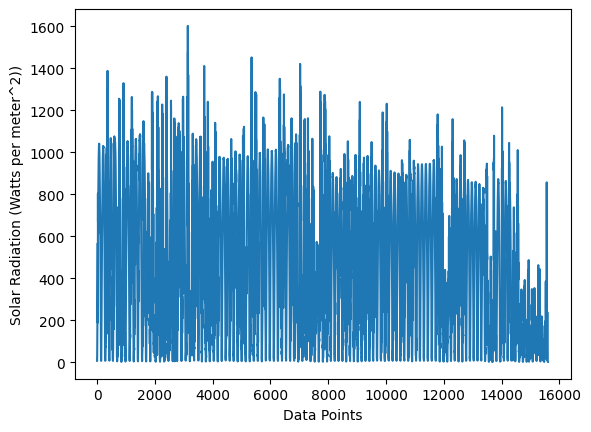

In [18]:
plt.plot(Y)
plt.xlabel('Data Points')
plt.ylabel('Solar Radiation (Watts per meter^2))')

Text(0.5, 0, 'Solar Radiation (Watts per meter^2)')

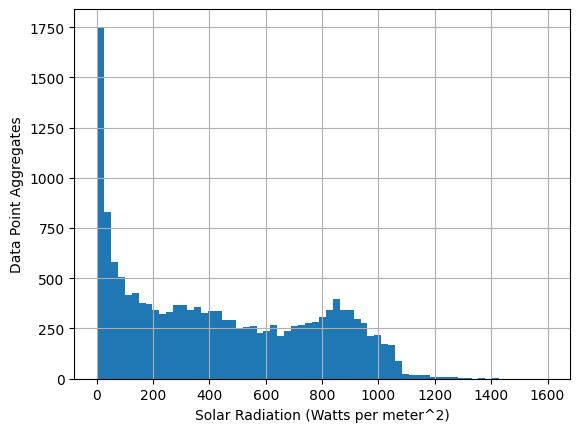

In [22]:
plt.hist(Y,density=False, bins=65)
plt.grid()
plt.ylabel('Data Point Aggregates')
plt.xlabel('Solar Radiation (Watts per meter^2)')

In [25]:
# Train/test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=1)
print(Y_train)

       Radiation
7900     1040.39
15273     256.08
6886     1043.86
7634      460.27
3665      365.99
...          ...
905       393.29
5192      838.84
12172     261.13
235       883.59
13349     623.15

[10457 rows x 1 columns]


In [28]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [30]:
Y_prediction = regressor.predict(X_test)

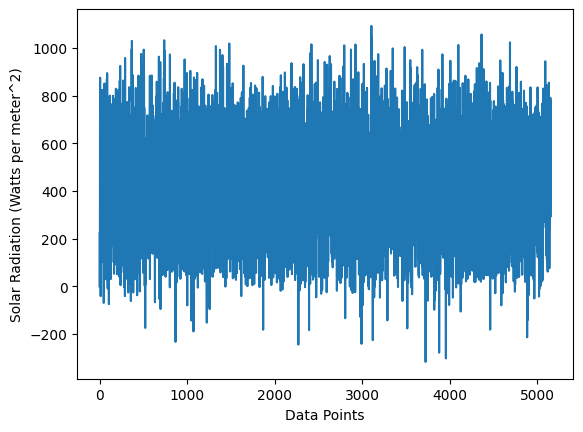

In [33]:
Y_prediction
Y_test = Y_test.reset_index(drop=True)
plt.xlabel('Data Points')
plt.ylabel('Solar Radiation (Watts per meter^2)')
plt.plot(Y_prediction)

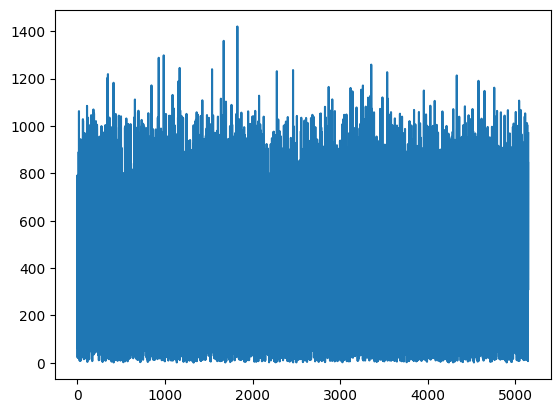

In [35]:
plt.plot(Y_test)

In [37]:
# Calculate accuracy
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test,Y_prediction))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test,Y_prediction))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test,Y_prediction)))

Mean Absolute Error:  195.40384330202966
Mean Squared Error:  59704.3084841212
Root Mean Squared Error:  244.34465102416544
